# OLDP Client Demo

This is a beginners level demo that shows how to use the [OLDP SDK for Python](https://github.com/openlegaldata/oldp-sdk-python).

*Note:* You can also access the API using your browser at https://de.openlegaldata.io/api/ (or [here](https://de.openlegaldata.io/api/schema/)).


## Installation

Install all repo requirements by running:
```
pipenv --python 3.7
pipenv install
```

To install this environment as a Jupyter Notebook kernel run:
```
pipenv run python -m ipykernel install --name oldp-notebook
```

If you want to use the SDK in your own project, you can install it with:
```
pipenv install git+https://github.com/openlegaldata/oldp-sdk-python.git#egg=oldp-api
```


## The API Client

We follow the [API documentation](https://github.com/openlegaldata/oldp-sdk-python#documentation-for-api-endpoints) to create an instance of the API client.

In [1]:
import oldp_client 

conf = oldp_client.Configuration()

conf.api_key['Authorization'] = '123abc'  # TODO Replace this with your API key
conf.api_key_prefix['Authorization'] = 'Token'

api_client = oldp_client.ApiClient(conf)

For each API endpoint we have to create a separate API client. For example, to get access to the API for courts, we have to do:

In [2]:
courts_api = oldp_client.CourtsApi(api_client)

## Writing Queries

Next, we show how to query the data OLDP has about courts. The API documentation lists all available methods and respective arguments.

In [3]:
courts = courts_api.courts_list().results
print("The API call returned {} courts.".format(len(courts)))
print("Example court:\n{}".format(courts[10]))

The API call returned 50 courts.
Example court:
{'address_locality': 'Alfeld',
 'city': 296,
 'code': 'AGALFLD',
 'court_type': 'AG',
 'description': '',
 'fax_number': '(0 51 81) 2 43 13',
 'homepage': None,
 'id': 492,
 'image': None,
 'jurisdiction': 'Ordentliche Gerichtsbarkeit',
 'level_of_appeal': 'Amtsgericht',
 'name': 'Amtsgericht Alfeld (Leine)',
 'postal_code': '31061',
 'slug': 'ag-alfeld-leine',
 'state': 11,
 'street_address': 'Kalandstr. 1',
 'telephone': '(0 51 81) 80 40'}


The value for city and state is an id of a separate table itself, that can be looked up in the respective APIs.

In [4]:
cities_api = oldp_client.CitiesApi(api_client)
states_api = oldp_client.StatesApi(api_client)

print("City: {}".format(cities_api.cities_read(courts[10].city)))
print("State: {}".format(states_api.states_read(courts[10].state)))

City: {'id': 296, 'name': 'Alfeld (Leine)', 'state': 11}
State: {'country': 1, 'id': 11, 'name': 'Niedersachsen', 'slug': 'niedersachsen'}


## Working with the Data

Finally, we learn how to visualize the word occurrence frequencies in the data as wordcloud.

Number of cases: 10


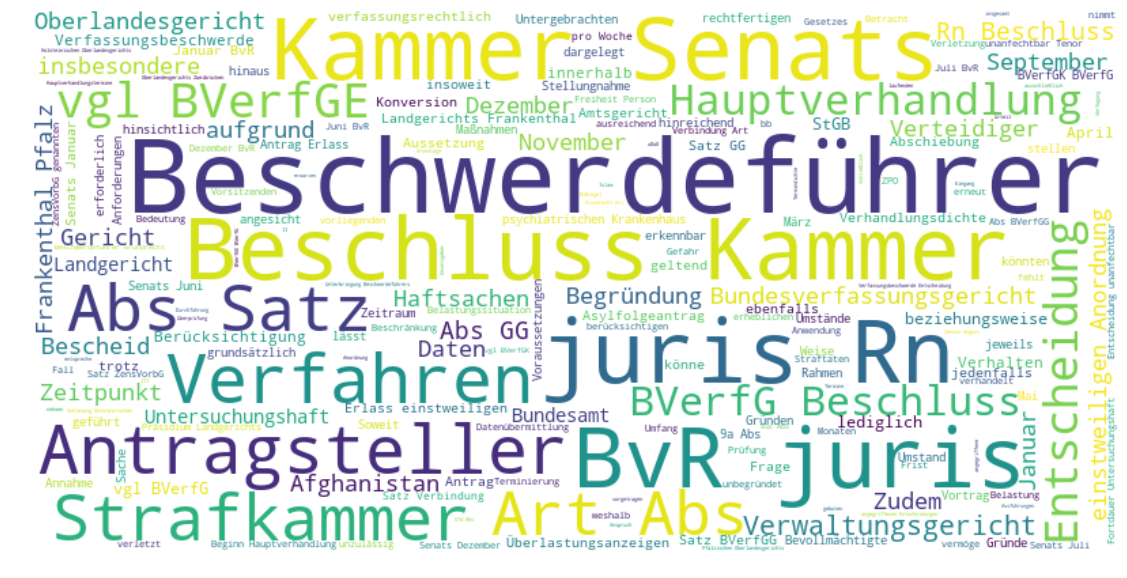

In [5]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
%matplotlib inline
nlp = spacy.load('de_core_news_sm')

# obtain the data
cases_api = oldp_client.CasesApi(api_client)
cases = cases_api.cases_list(court=3).results
print("Number of cases: {}".format(len(cases)))

# clean the data
text = ''
for case in cases:
    # remove all HTML content from the data
    soup = BeautifulSoup(case.content)
    text += soup.get_text().strip()

# visualize the data as wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=nlp.Defaults.stop_words).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()